# Multiwavelength cutout

In [1]:
import importlib as imp
import astroquery
imp.reload(astroquery)
import astroquery.herschel.higal
imp.reload(astroquery.herschel.higal)
import pylab as pl
pl.rcParams['figure.dpi'] = 200

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
%run /orange/adamginsburg/mgps/mgps/analysis/make_sed_cutout_image.py

In [4]:
paths.basepath = '/orange/adamginsburg/mgps/mgps/'

In [5]:
coord = SkyCoord("17:45:57.7530532310 -28:57:10.7694483833", unit=(u.h, u.deg), frame='icrs')
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.0246741, -0.0727428)>

### Final Version

In [6]:
ims = {
    #'4-9 keV': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/acisi-band3-4.fits',
    #'3.6um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits',
    #'4.5um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits',
    #'5.8um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits',
    #'8.0um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits',
    # '3.6um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I1_13368832_0000_6_E8709676_maic.fits',
    # '4.5um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I2_13368832_0000_6_E8709929_maic.fits',
    # '5.8um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I3_13368832_0000_6_E8709933_maic.fits',
    # '8.0um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I4_13368832_0000_6_E8709940_maic.fits',
    
    '3.6um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I1_13368832_0000_6_E8709676_maic.fits',
    '4.5um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I2_13368832_0000_6_E8709929_maic.fits',
    '5.8um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I3_13368832_0000_6_E8709933_maic.fits',
    '8.0um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I4_13368832_0000_6_E8709940_maic.fits',
    '24um': '/orange/adamginsburg/cmz/mipsgal_24micron_data/gc_mosaic_MIPSGAL_gal.fits',
    '70um': '/orange/adamginsburg/cmz/herschel/destripe_l000_blue_wgls_rcal.fits',
    '160um': '/orange/adamginsburg/cmz/herschel/destripe_l000_red_wgls_rcal.fits',
    '250um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PSW_wgls_rcal.fits',
    #'450um': '/orange/adamginsburg/cmz/scuba2/450um_map.fits',
    #'350um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PMW_wgls_rcal.fits',
    #'500um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PLW_wgls_rcal.fits',
    '850um': '/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud_sci.spw0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15.mfs.I.manual.image.pbcor.fits',
    '3mm': '/orange/adamginsburg/ACES/mosaics/continuum/12m_continuum_commonbeam_circular_reimaged_mosaic_MUSTANGfeathered.fits',
    '6cm': '/orange/adamginsburg/cmz/xinglu/SgrA_CONT_tclean_nterm2.image.tt0.fits',
    '20cm': '/orange/adamginsburg/cmz/meerkat/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
}

In [7]:
import matplotlib.colors as mcolors
import numpy as np
from astropy.visualization import simple_norm

colors1 = pl.cm.gray_r(np.linspace(0., 1, 128))
colors2 = pl.cm.hot(np.linspace(0, 1, 128))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [8]:
import regions

In [9]:
region = regions.RectangleSkyRegion(center=coord, width=15*u.arcsec, height=15*u.arcsec)
cutregion = regions.CircleSkyRegion(center=coord, radius=15*u.arcsec) # circumscribe the above region so we can match RA/Dec to Galactic

In [10]:
bigregion = regions.RectangleSkyRegion(center=coord, width=35*u.arcsec, height=35*u.arcsec)
bigcircregion = regions.CircleSkyRegion(center=coord, radius=35*u.arcsec)

In [11]:
biggerregion = regions.RectangleSkyRegion(center=coord, width=65*u.arcsec, height=65*u.arcsec)

In [12]:
from astropy.wcs import WCS

In [13]:
def galactic_cutout(hdu, reg):
    import reproject.mosaicking, reproject
    csys, sz = reproject.mosaicking.find_optimal_celestial_wcs(hdu, frame='galactic')
    newdata, _ = reproject.reproject_interp(input_data=hdu,
                                            output_projection=csys,
                                            shape_out=sz)
    preg = reg.to_pixel(csys)
    msk = preg.to_mask()
    slcs,_ = msk.get_overlap_slices(newdata.shape)
    new_hdu = fits.PrimaryHDU(data=newdata[slcs], header=csys[slcs].to_header())
    return new_hdu, csys[slcs]

### Multipanel Image

2, 3, 4, 5, 6, 7, 8, 9, 

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


10, 11, 

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


12, 

13, 

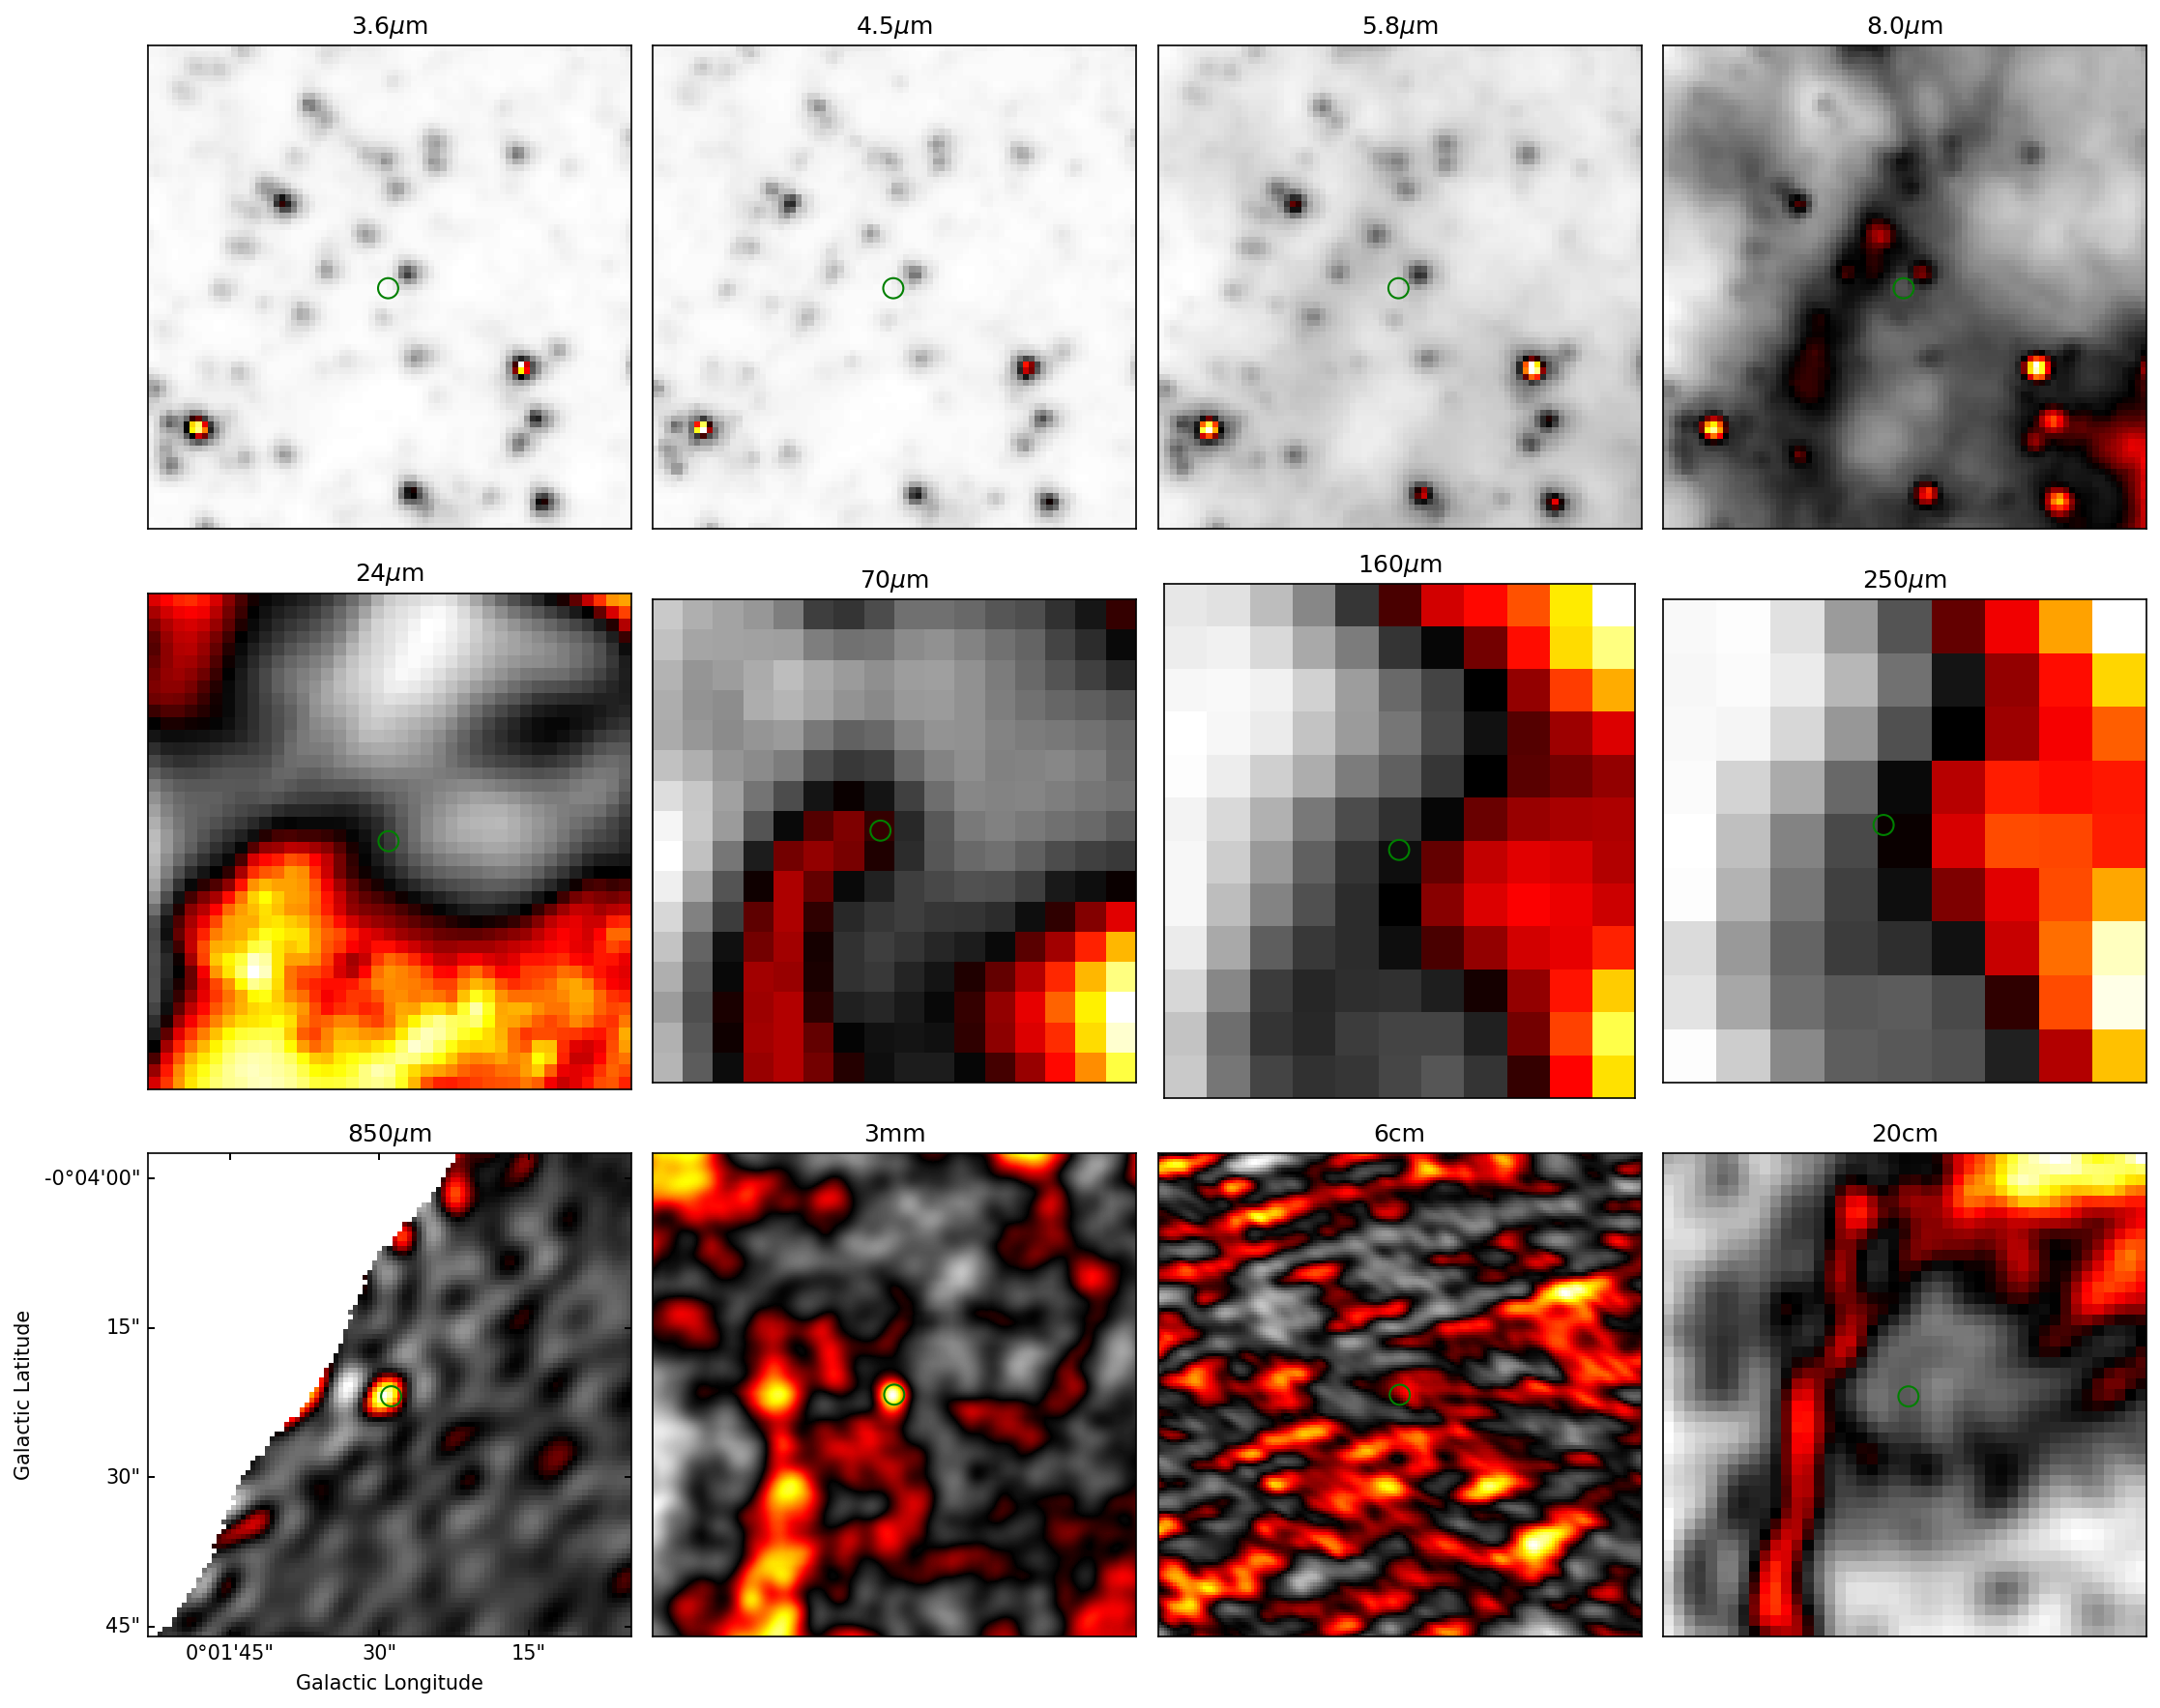

In [14]:
pl.figure(figsize=(15,12), dpi=150)
ii = 1
for wl, fn in ims.items():
    fh = fits.open(fn)
    ww = WCS(fh[0].header).celestial
    
    msk = bigcircregion.to_pixel(ww).to_mask()
    slcs, _ = msk.get_overlap_slices(fh[0].data.squeeze().shape)
    co = msk.cutout(fh[0].data.squeeze())

    hdu, ww = galactic_cutout((co, ww[slcs]), bigregion)
    
    ax = pl.subplot(3,4,ii, projection=ww)
    ax.imshow(hdu.data, cmap=mymap)
    ax.scatter_coord(coord, marker='o', facecolor='none', edgecolor='g', s=100)
    #pl.xticks([])
    #pl.yticks([])
    #pl.xlabel("")
    #pl.ylabel("")
    lon = ax.coords[0]
    lat = ax.coords[1]
    if ii == 9:
        lon.set_axislabel('Galactic Longitude')
        lat.set_axislabel('Galactic Latitude')
    else:
        lon.set_ticks_visible(False)
        lon.set_ticklabel_visible(False)
        lat.set_ticks_visible(False)
        lat.set_ticklabel_visible(False)
        lon.set_axislabel('')
        lat.set_axislabel('')
    ax.set_title(wl.replace('u',r'$\mu$'))
    ii += 1
    print(ii, end=", ")

pl.tight_layout()
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/continuum_cutouts.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/continuum_cutouts.png', bbox_inches='tight')

### Herschel upper limits

In [15]:
from radio_beam import Beam
import radio_beam

In [16]:
import latex_info

In [17]:
from astropy.table import Table
centrfittbl = Table.read('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.ecsv')
centrfittbl.add_index('Image Data')
centrfittbl.add_index('Image Type')
b7r = centrfittbl.loc['Continuum'].loc['Image Type', 'B7']
b3r = centrfittbl.loc['Continuum'].loc['Image Type', 'spw33+35']
spectral_index = (
    np.log(b7r['Amp[Jy]'] / b3r['Amp[Jy]']) /
    np.log((350*u.GHz/(102*u.GHz)).decompose().value))
spectral_index

3.2571647865885356

In [18]:
from astropy.table import Table
centrfittbl = Table.read('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.ecsv')
centrfittbl.add_index(['Image Data', 'Image Type'])

In [19]:
import glob
from spectral_cube import SpectralCube

In [20]:
path = '/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/'
imgs = sorted(glob.glob(f"{path}/*.cube.*.image"))
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cubes = [SpectralCube.read(fn) for fn in imgs[:1]]
try:
    b3beam = cubes[0].beams.common_beam()
except AttributeError:
    b3beam = cubes[0].beam

In [21]:
fns_2017 = glob.glob("/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/*cube*image.pbcor")
scubes2017 = [SpectralCube.read(fn, format='casa_image').subcube_from_regions([region]) for fn in fns_2017[:1]]
b7beam = scubes2017[0].beam

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [22]:
centrfittbl

Image Data,Image Type,Amp,Amp[Jy],RA,Dec,Major,Minor,PA,D. Major,D. Minor,D. PA,eAmp,eAmp[Jy],eRA,eDec,eMajor,eMinor,ePA,Amp[mJy],eAmp[mJy]
,,K,Jy / beam,deg,deg,arcsec,arcsec,deg,arcsec,arcsec,deg,K,Jy / beam,deg,deg,arcsec,arcsec,,mJy / beam,mJy / beam
str14,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SO 2(3)-1(2),m0,148.32008973612423,2.795070225002834,266.49059621672524,-28.952990249181713,1.5486420853915066,1.8164248391300035,205.08120935934954,0.8490807439212033,0.5113922875604401,-81.16181594416656,1.12337196911429,0.02116977914495836,1.5825875784473447e-06,1.4295796949875372e-06,0.011729602184894276,0.013757941659364397,1.9157313900457786,2795.070225002834,21.169779144958362
CS 2-1,m0,55.650578910083006,1.0210559520261366,266.4906315066001,-28.95299319702855,2.554813769963019,1.9280031774006974,86.04330791498653,2.0413880914318168,1.1669502937327825,80.21977333385156,0.7631606817915424,0.014002185992613181,4.12873825022717e-06,3.124527899431712e-06,0.035036692951906125,0.026440185415154697,1.9478014394002021,1021.0559520261367,14.002185992613182
CS 2-1 2012,m0,39.360510712713065,1.4592038781000234,266.4907519289075,-28.952964840932044,4.340336851482971,3.298723509043788,95.86530853346329,3.3763950879892164,2.799194720494421,-78.41912117451031,0.461802848515151,0.01712031920493588,5.994001920594128e-06,4.582982726313251e-06,0.05092578092411806,0.03870418697793284,1.7106539063530941,1459.2038781000233,17.12031920493588
Continuum,spw33+35,0.1035993267353875,0.0017704635890274662,266.49064343001675,-28.95297402672501,1.7296387895749605,1.4992054217510515,85.2914703977307,0.993674639596028,0.4279084517674038,60.15390194446932,0.002937516986997629,5.020077862969828e-05,5.780426177014309e-06,5.019962665133276e-06,0.04904370567893654,0.04250873744200052,8.005872246318104,1.7704635890274663,0.05020077862969828
Continuum,spw25+27,0.10767496597887678,0.0017578831812161775,266.49062236229594,-28.952949925750687,1.9705026144748417,1.7834990024286284,62.417315041963086,1.2200320022600548,0.20852315606876737,33.671152191719806,0.002169220789288237,3.541432966491337e-05,4.591073254788286e-06,4.337482781411711e-06,0.03969701316536432,0.0359302776867803,8.173329586857816,1.7578831812161775,0.035414329664913376
Continuum 2012,cont,0.09061101825767252,0.0014793000729555104,266.490628207597,-28.952906868429015,1.958300094208522,1.2451619133548697,436.27493834794296,nan,nan,nan,0.003058240145497893,4.992830847000693e-05,7.664814114559996e-06,5.1577534226871375e-06,0.0660942134928933,0.04201671566305052,2.9174789063973816,1.4793000729555104,0.04992830847000693
Continuum,B7,0.08962154543570341,0.09821868120890748,266.4907408658049,-28.952833241989136,1.3022684566908564,0.992911297185128,88.30386744262493,nan,nan,nan,0.0036753869151865642,0.004027956157050236,1.4834713288860694e-05,1.1317180893926915e-05,0.12578244972080838,0.09590909834255602,6.053660767842139,98.21868120890748,4.027956157050236


In [23]:
from radio_beam import Beam
import radio_beam
from astropy.wcs import WCS

In [24]:
herschelspitzer = {
    #'3.6um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I1.fits',
    #'4.5um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I2.fits',
    #'5.8um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I3.fits',
    #'8.0um': '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits',
    # '3.6um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I1_13368832_0000_6_E8709676_maic.fits',
    # '4.5um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I2_13368832_0000_6_E8709929_maic.fits',
    # '5.8um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I3_13368832_0000_6_E8709933_maic.fits',
    # '8.0um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cutout_SPITZER_I4_13368832_0000_6_E8709940_maic.fits',
    '3.6um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I1_13368832_0000_6_E8709676_maic.fits',
    '4.5um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I2_13368832_0000_6_E8709929_maic.fits',
    '5.8um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I3_13368832_0000_6_E8709933_maic.fits',
    '8.0um': '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SPITZER_stolovy_I4_13368832_0000_6_E8709940_maic.fits',
    '24um': '/orange/adamginsburg/cmz/mipsgal_24micron_data/gc_mosaic_MIPSGAL_gal.fits',
    '70um': '/orange/adamginsburg/cmz/herschel/destripe_l000_blue_wgls_rcal.fits',
    '160um': '/orange/adamginsburg/cmz/herschel/destripe_l000_red_wgls_rcal.fits',
    '250um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PSW_wgls_rcal.fits',
    '350um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PMW_wgls_rcal.fits',
    '500um': '/orange/adamginsburg/cmz/herschel/destripe_l000_PLW_wgls_rcal.fits',
    #'450um': '/orange/adamginsburg/cmz/scuba2/450um_map.fits',
    #'850um': '/orange/adamginsburg/cmz/scuba2/850um_map.fits',
    '60000um': '/orange/adamginsburg/cmz/xinglu/SgrA_CONT_tclean_nterm2.image.tt0.fits',
    '200000um': '/orange/adamginsburg/cmz/meerkat/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
}
# beams from Traficante+ 2011 (Except Spitzer)
herschelspitzer_resolution = {
    '3.6um': Beam(2*u.arcsec),
    '4.5um': Beam(2*u.arcsec),
    '5.8um': Beam(2*u.arcsec),
    '8.0um': Beam(2*u.arcsec),
    '24um': Beam(6*u.arcsec),
    '70um': Beam(10.7*u.arcsec, 9.7*u.arcsec),
    '160um': Beam(13.9*u.arcsec, 13.2*u.arcsec),
    '250um': Beam(23.9*u.arcsec, 22.8*u.arcsec),
    '350um': Beam(31.3*u.arcsec, 29.3*u.arcsec),
    '500um': Beam(43.8*u.arcsec, 41.1*u.arcsec),
    '450um': Beam(6.5*u.arcsec),
    '850um': Beam(12*u.arcsec),
    '60000um': radio_beam.Beam.from_fits_header(fits.getheader('/orange/adamginsburg/cmz/xinglu/SgrA_CONT_tclean_nterm2.image.tt0.fits')),
    '200000um': radio_beam.Beam.from_fits_header(fits.getheader('/orange/adamginsburg/cmz/meerkat/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'))
}

latexdict_ulim = latex_info.latexdict.copy()
latexdict_ulim['header_start'] = r'\label{tab:sed}'
latexdict_ulim['caption'] = 'Spectral Energy Distribution'
latexdict_ulim['preamble'] = r'\centering'
latexdict_ulim['tablefoot'] = '\par\n' + r'Except for the ALMA measurements at 3 mm and 850 \um, these values are upper limits.'
formats = {'Wavelength': '0.1f',
           'Surface Brightness': '0.3f',
           'Beam Area': '0.3e',
           'Flux': '0.3g'
          }

ulimtbl = []

for wl, fn in herschelspitzer.items():
    fh = fits.open(fn)
    ww = WCS(fh[0].header).celestial
    xx, yy = np.array(list(map(int, ww.world_to_pixel(coord))))
    #print(crd)
    val = fh[0].data[yy, xx]
    if u.Quantity(wl) < 1*u.mm:
        print(wl, val, (u.Quantity(val, u.MJy/u.sr)*herschelspitzer_resolution[wl].sr).to(u.Jy))
        ulimtbl.append((u.Quantity(wl.strip('um'), u.um), val*u.MJy/u.sr,
                        herschelspitzer_resolution[wl].sr,
                        (u.Quantity(val, u.MJy/u.sr)*herschelspitzer_resolution[wl].sr).to(u.Jy)))
    else:
        beam = herschelspitzer_resolution[wl]
        print(wl, ((u.Quantity(val, u.Jy))/beam.sr).to(u.MJy/u.sr), (u.Quantity(val, u.Jy)), )
              
        ulimtbl.append([u.Quantity(wl.strip('um'), u.um),
                        val*u.Jy/beam.sr,
                        beam.sr,
                        u.Quantity(val, u.Jy)])

b7ind = (centrfittbl['Image Data'] == 'Continuum') & (centrfittbl['Image Type'] == 'B7')
b3ind = (centrfittbl['Image Data'] == 'Continuum') & (centrfittbl['Image Type'] == 'spw33+35')

assert centrfittbl[b7ind]['Amp[Jy]'][0]*u.Jy > 90*u.mJy

ulimtbl.append([850*u.um,
                centrfittbl[b7ind]['Amp[Jy]'][0]*u.Jy/b7beam.sr,
                b7beam.sr,
                centrfittbl[b7ind]['Amp[Jy]'][0]*u.Jy])
ulimtbl.append([(102*u.GHz).to(u.um, u.spectral()), 
                centrfittbl[b3ind]['Amp[Jy]'][0]*u.Jy/b3beam.sr,
                b3beam.sr,
                centrfittbl[b3ind]['Amp[Jy]'][0]*u.Jy])

# SMA data 4/19/2024
b6bm = radio_beam.Beam(3*u.arcsec) # GUESS
ulimtbl.append([(230*u.GHz).to(u.um, u.spectral()), 
                16.6*u.mJy/b6bm.sr,
                b6bm,
                16.6*u.mJy])
    
ulimtbl = Table(rows=ulimtbl, names=['Wavelength', 'Surface Brightness', 
                                     'Beam Area',
                                     'Flux'])
ulimtbl.sort('Wavelength')
ulimtbl.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED.tex',
              latexdict=latexdict_ulim,
              formats=formats,
              overwrite=True)
ulimtbl

3.6um 51.612995 0.005498360457354556 Jy
4.5um 62.787807 0.006688819294043548 Jy
5.8um 211.37444 0.02251783362134656 Jy
8.0um 492.62393 0.05247949551600777 Jy
24um 1304.0269248889813 1.2502682808379195 Jy
70um 26726.094 73.87630292353796 Jy
160um 26034.621 127.21963545785589 Jy
250um 12025.196 174.5175374011474 Jy
350um 4771.45 116.54040066643901 Jy
500um 1484.6283 71.17833420966485 Jy
60000um 1.4814827273092612 MJy / sr 0.0001108699434553273 Jy
200000um 12.638233449589118 MJy / sr 0.005385431544995406 Jy


Wavelength,Surface Brightness,Beam Area,Flux
um,MJy / sr,sr,Jy
float64,float64,float64,float64
3.6,51.61299514770508,1.0653054413175313e-10,0.005498360457354556
4.5,62.78780746459961,1.0653054413175313e-10,0.006688819294043548
5.8,211.3744354248047,1.0653054413175313e-10,0.02251783362134656
8.0,492.6239318847656,1.0653054413175313e-10,0.05247949551600777
24.0,1304.0269248889813,9.587748971857782e-10,1.2502682808379195
70.0,26726.09375,2.764201293858664e-09,73.87630292353796
160.0,26034.62109375,4.886556059323516e-09,127.21963545785589
250.0,12025.1962890625,1.4512656027068726e-08,174.5175374011474


In [25]:
from astropy.modeling.models import BlackBody
import dust_emissivity

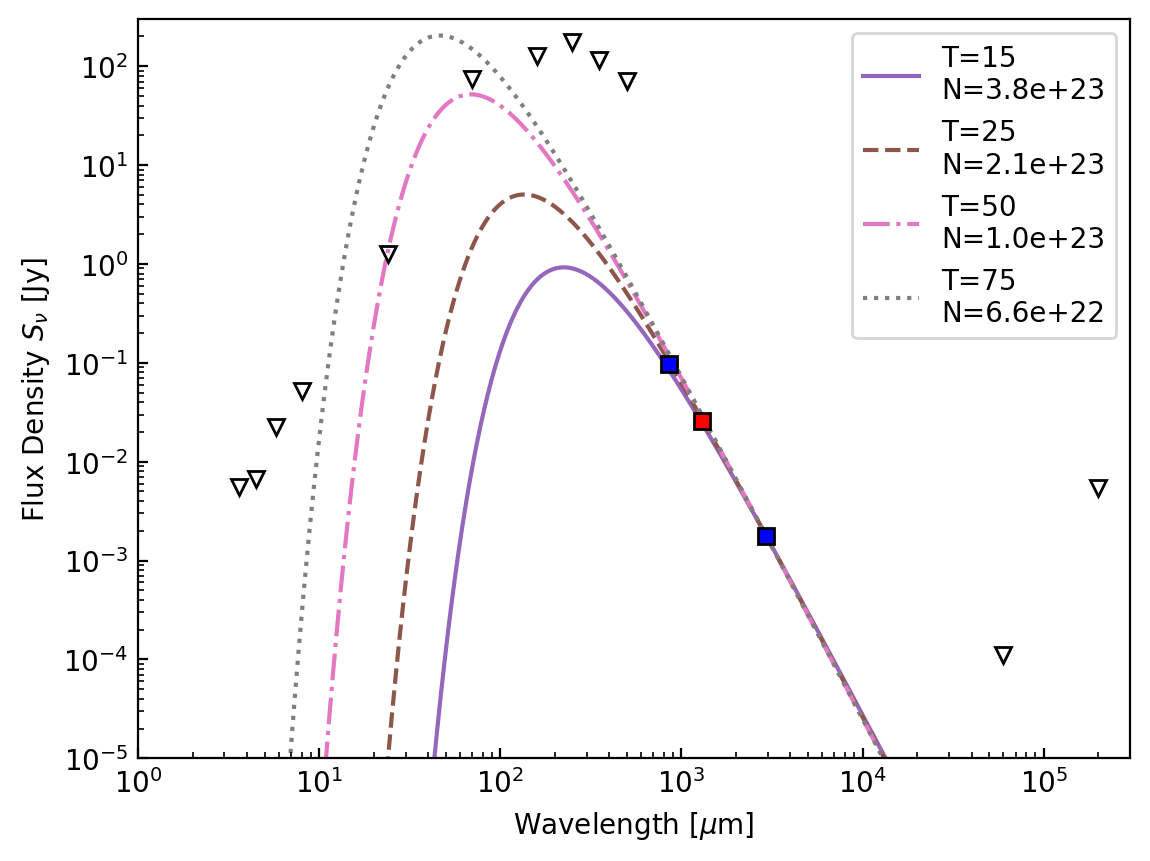

In [26]:
ulwl = ulimtbl['Wavelength']
pl.plot(ulwl[ulwl < 800*u.um], ulimtbl['Flux'][ulwl < 800*u.um], 'v', markerfacecolor='none', markeredgecolor='k')
pl.plot(ulwl[ulwl > 1*u.cm], ulimtbl['Flux'][ulwl > 1*u.cm], 'v', markerfacecolor='none', markeredgecolor='k')
pl.plot((102*u.GHz).to(u.um, u.spectral()), centrfittbl['Amp[Jy]'][b3ind], 's', markeredgecolor='k', markerfacecolor='b')
pl.plot(850*u.um, centrfittbl['Amp[Jy]'][b7ind], 's', markeredgecolor='k', markerfacecolor='b')
nurange = np.geomspace(10*u.GHz, 100*u.THz, 1000)
beta = 1.5
for tem, ls in zip((15, 25, 50, 75), ('-', '--', '-.', ':')):
    bm = b3beam.sr
    column = dust_emissivity.dust.colofsnu(nu=102*u.GHz,
                                           snu_per_beam=u.Quantity(b3r['Amp[Jy]'], u.Jy)/bm,
                                           beta=beta,
                                           nu0=271.1*u.GHz, 
                                           kappa0=0.0114*u.cm**2*u.g**-1,
                                           temperature=tem*u.K)
    mbb = dust_emissivity.blackbody.modified_blackbody(nurange,
                                                       temperature=tem*u.K,
                                                       beta=beta,
                                                       nu0=271.1*u.GHz, 
                                                       kappa0=0.0114*u.cm**2*u.g**-1*100,
                                                       column=column,
                                                      ).to(u.Jy/u.sr)*bm
    pl.plot(nurange.to(u.um, u.spectral()), mbb.to(u.Jy), linestyle=ls, zorder=-5, label=f'T={tem}\nN={column.value:0.1e}')
pl.loglog();
pl.axis([1,1e5,5e-4,300]);
pl.legend(loc='best',);
pl.xlabel("Wavelength [$\mu$m]")
pl.ylabel("Flux Density $S_\\nu$ [Jy]")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits.png', bbox_inches='tight')
pl.axis([1,3e5,1e-5,300]);
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA.png', bbox_inches='tight')
pl.plot((230*u.GHz).to(u.um, u.spectral()), (26.0*u.mJy).to(u.Jy), 's', markeredgecolor='k', markerfacecolor='r')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA_SMA.png', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA_SMA.pdf', bbox_inches='tight')

In [27]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

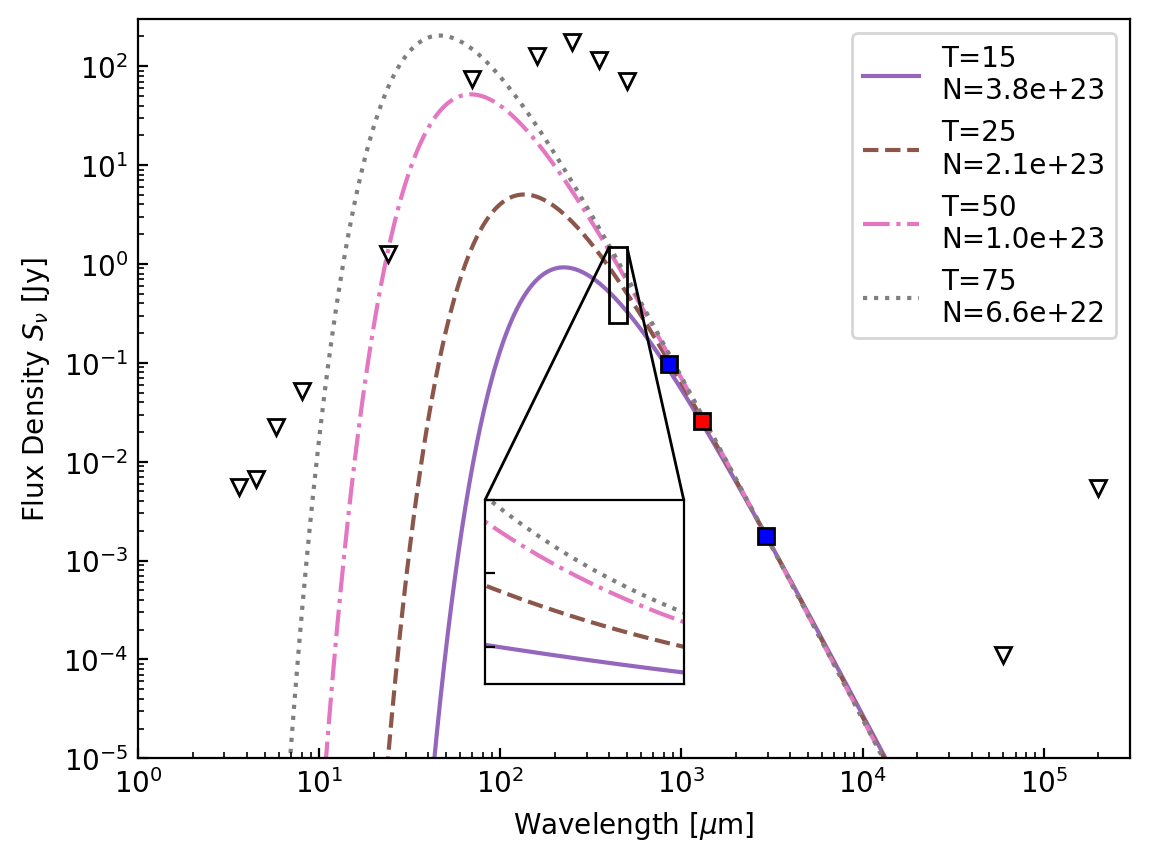

In [28]:
ax = pl.subplot()
# inset axes....
x1, x2, y1, y2 = 400, 500, 2.5e-1, 1.5  # subregion of the original image


ulwl = ulimtbl['Wavelength']
ax.plot(ulwl[ulwl < 800*u.um], ulimtbl['Flux'][ulwl < 800*u.um], 'v', markerfacecolor='none', markeredgecolor='k')
ax.plot(ulwl[ulwl > 1*u.cm], ulimtbl['Flux'][ulwl > 1*u.cm], 'v', markerfacecolor='none', markeredgecolor='k')
ax.plot((102*u.GHz).to(u.um, u.spectral()), centrfittbl['Amp[Jy]'][b3ind], 's', markeredgecolor='k', markerfacecolor='b')
ax.plot(850*u.um, centrfittbl['Amp[Jy]'][b7ind], 's', markeredgecolor='k', markerfacecolor='b')

axins = ax.inset_axes(
    [0.35, 0.1, 0.20, 0.25],
    xlim=(x1, x2), ylim=(y1, y2),
    #xticklabels=[], yticklabels=[]
)

nurange = np.geomspace(10*u.GHz, 100*u.THz, 1000)
beta = 1.5
for tem, ls in zip((15, 25, 50, 75), ('-', '--', '-.', ':')):
    bm = b3beam.sr
    column = dust_emissivity.dust.colofsnu(nu=102*u.GHz,
                                           snu_per_beam=u.Quantity(b3r['Amp[Jy]'], u.Jy)/bm,
                                           beta=beta,
                                           nu0=271.1*u.GHz, 
                                           kappa0=0.0114*u.cm**2*u.g**-1,
                                           temperature=tem*u.K)
    mbb = dust_emissivity.blackbody.modified_blackbody(nurange,
                                                       temperature=tem*u.K,
                                                       beta=beta,
                                                       nu0=271.1*u.GHz, 
                                                       kappa0=0.0114*u.cm**2*u.g**-1*100,
                                                       column=column,
                                                      ).to(u.Jy/u.sr)*bm
    L, = ax.plot(nurange.to(u.um, u.spectral()), mbb.to(u.Jy), linestyle=ls, zorder=-5, label=f'T={tem}\nN={column.value:0.1e}')
    axins.plot(nurange.to(u.um, u.spectral()), mbb.to(u.Jy), linestyle=ls, zorder=-5, 
               color=L.get_color(),
               label=f'T={tem}\nN={column.value:0.1e}')


#ax.indicate_inset_zoom(axins, edgecolor="black", )
blah = mark_inset(ax, axins, loc1=1, loc2=2)

ax.loglog();
ax.axis([1,1e5,5e-4,300]);
pl.legend(loc='best',);
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Flux Density $S_\\nu$ [Jy]")
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits.pdf', bbox_inches='tight')
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits.png', bbox_inches='tight')
ax.axis([1,3e5,1e-5,300]);
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA.pdf', bbox_inches='tight')
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA.png', bbox_inches='tight')
ax.plot((230*u.GHz).to(u.um, u.spectral()), (26.0*u.mJy).to(u.Jy), 's', markeredgecolor='k', markerfacecolor='r')
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA_SMA.pdf', bbox_inches='tight')
# pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_upperlimits_VLA_SMA.png', bbox_inches='tight')

#axins.loglog()
axins.semilogx()

# logscale: hide ticks
# holy fucking hackery.  This took absolutely forever to come up with.
axins.yaxis.set_minor_formatter(lambda x, y: "")
axins.xaxis.set_minor_formatter(lambda x, y: "")
axins.yaxis.set_major_formatter(lambda x, y: "")
axins.xaxis.set_major_formatter(lambda x, y: "")

pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_planned_B9.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SED_with_planned_B9.png', bbox_inches='tight')

In [29]:
axins.yaxis.get_major_formatter()

### Chandra 

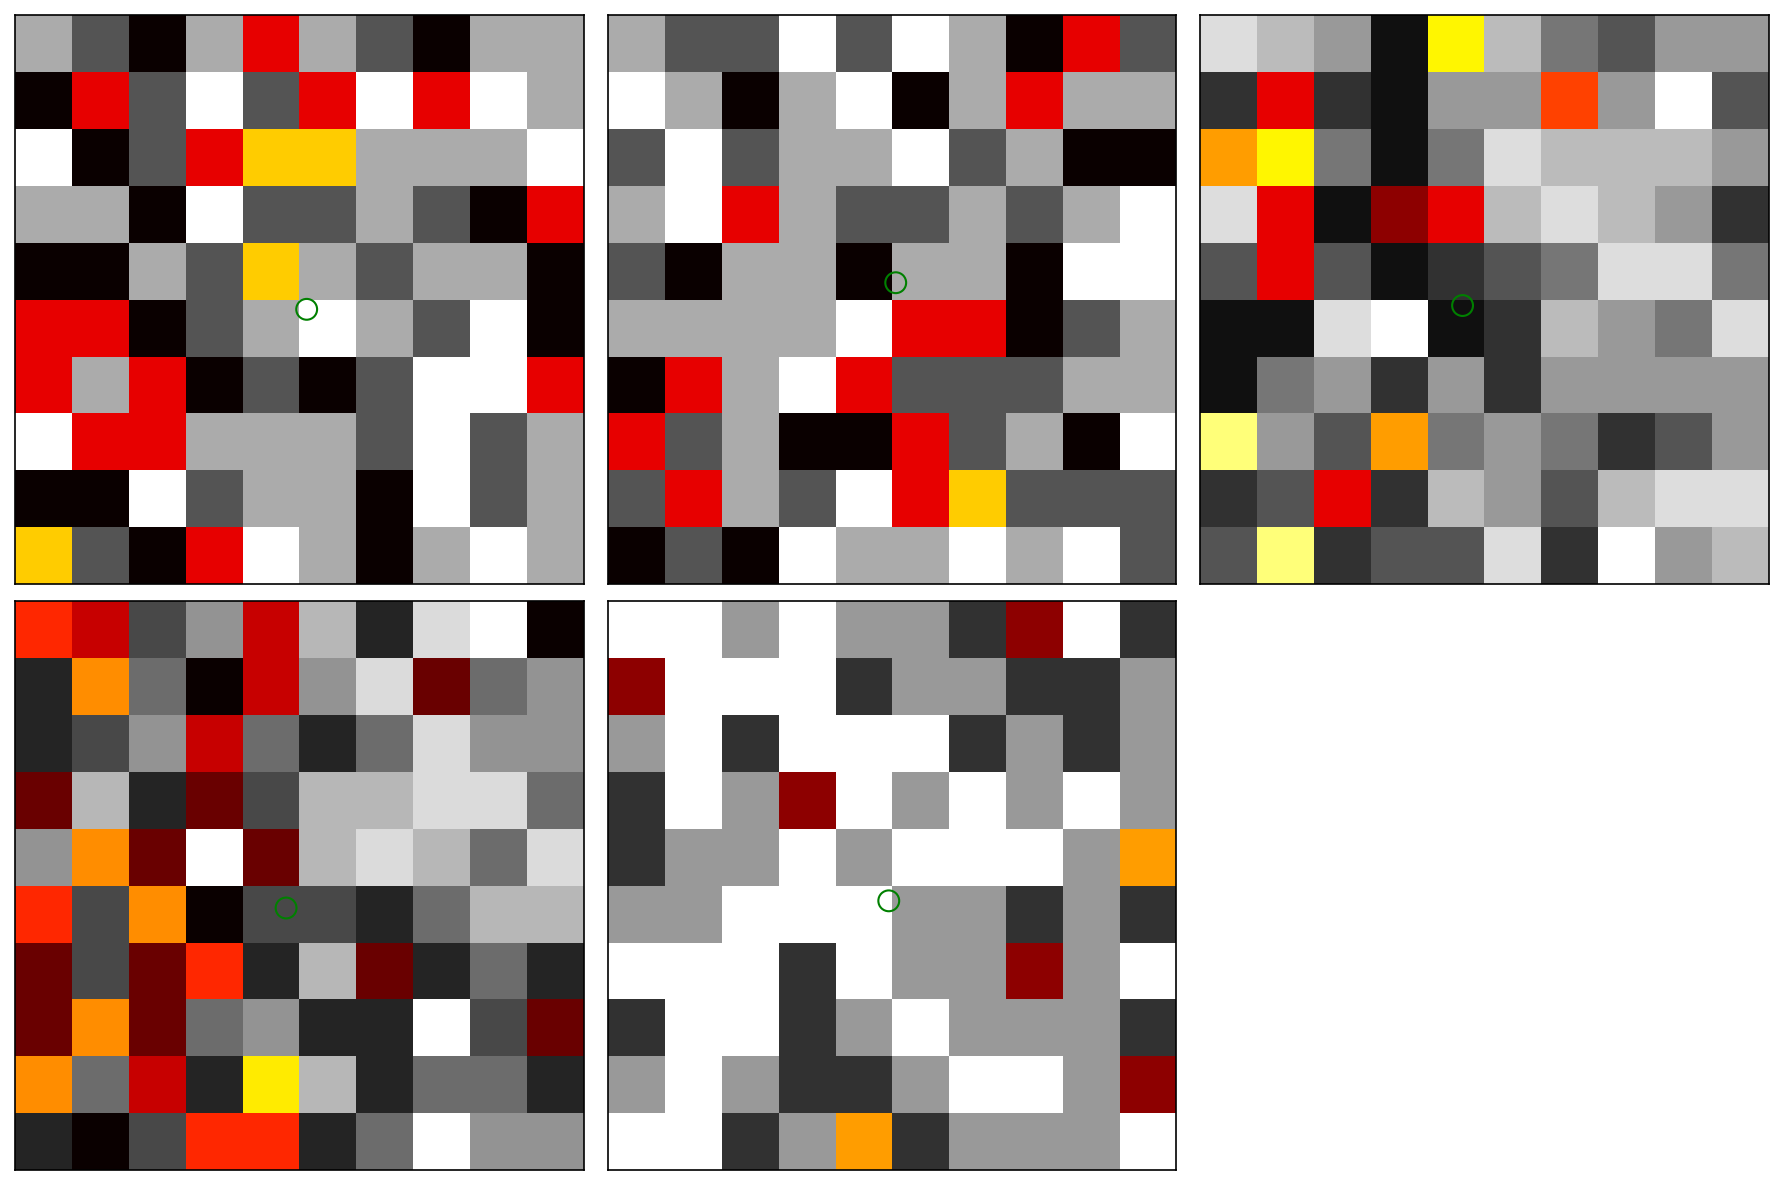

In [30]:
pl.figure(figsize=(12,8), dpi=150)
ii = 1
for fn in glob.glob('/orange/adamginsburg/cmz/chandra/sgra/acis*fits'):
    fh = fits.open(fn)
    ww = WCS(fh[0].header).celestial
    msk = bigregion.to_pixel(ww).to_mask()
    slcs, _ = msk.get_overlap_slices(fh[0].data.squeeze().shape)
    co = msk.cutout(fh[0].data.squeeze())
    ax = pl.subplot(2,3,ii, projection=ww[slcs])
    ax.imshow(co, cmap=mymap)
    ax.scatter_coord(coord, marker='o', facecolor='none', edgecolor='g', s=100)

    lon = ax.coords[0]
    lat = ax.coords[1]
    lon.set_ticks_visible(False)
    lon.set_ticklabel_visible(False)
    lat.set_ticks_visible(False)
    lat.set_ticklabel_visible(False)
    lon.set_axislabel('')
    lat.set_axislabel('')
    ii += 1

pl.tight_layout()
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_overlays.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_overlays.png', bbox_inches='tight')

In [31]:
%%bash
ls /orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/*spw33_35*.image.tt0.pbcor.fits

/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits
/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.v1high_spw33_35.cont.I.iter1.image.tt0.pbcor.fits


In [32]:
fn = "/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits"
if not os.path.exists(fn):
    fn = "/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.oldhigh_spw33_35.cont.I.iter1.image.tt0.pbcor.fits"
if not os.path.exists(fn):
    fn = "/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.v1high_spw33_35.cont.I.iter1.image.tt0.pbcor.fits"
contcube = SpectralCube.read(fn)
fh = fits.open(fn)
contwcs = WCS(fh[0].header).celestial
preg = region.to_pixel(contwcs)
msk = preg.to_mask()
contim = msk.cutout(fh[0].data.squeeze());
beam = radio_beam.Beam.from_fits_header(fh[0].header)
jtok = beam.jtok(102*u.GHz).value
contim = contim * jtok
slcs,_ = msk.get_overlap_slices(fh[0].data.squeeze().shape)
contwcs_co = contwcs[slcs] 

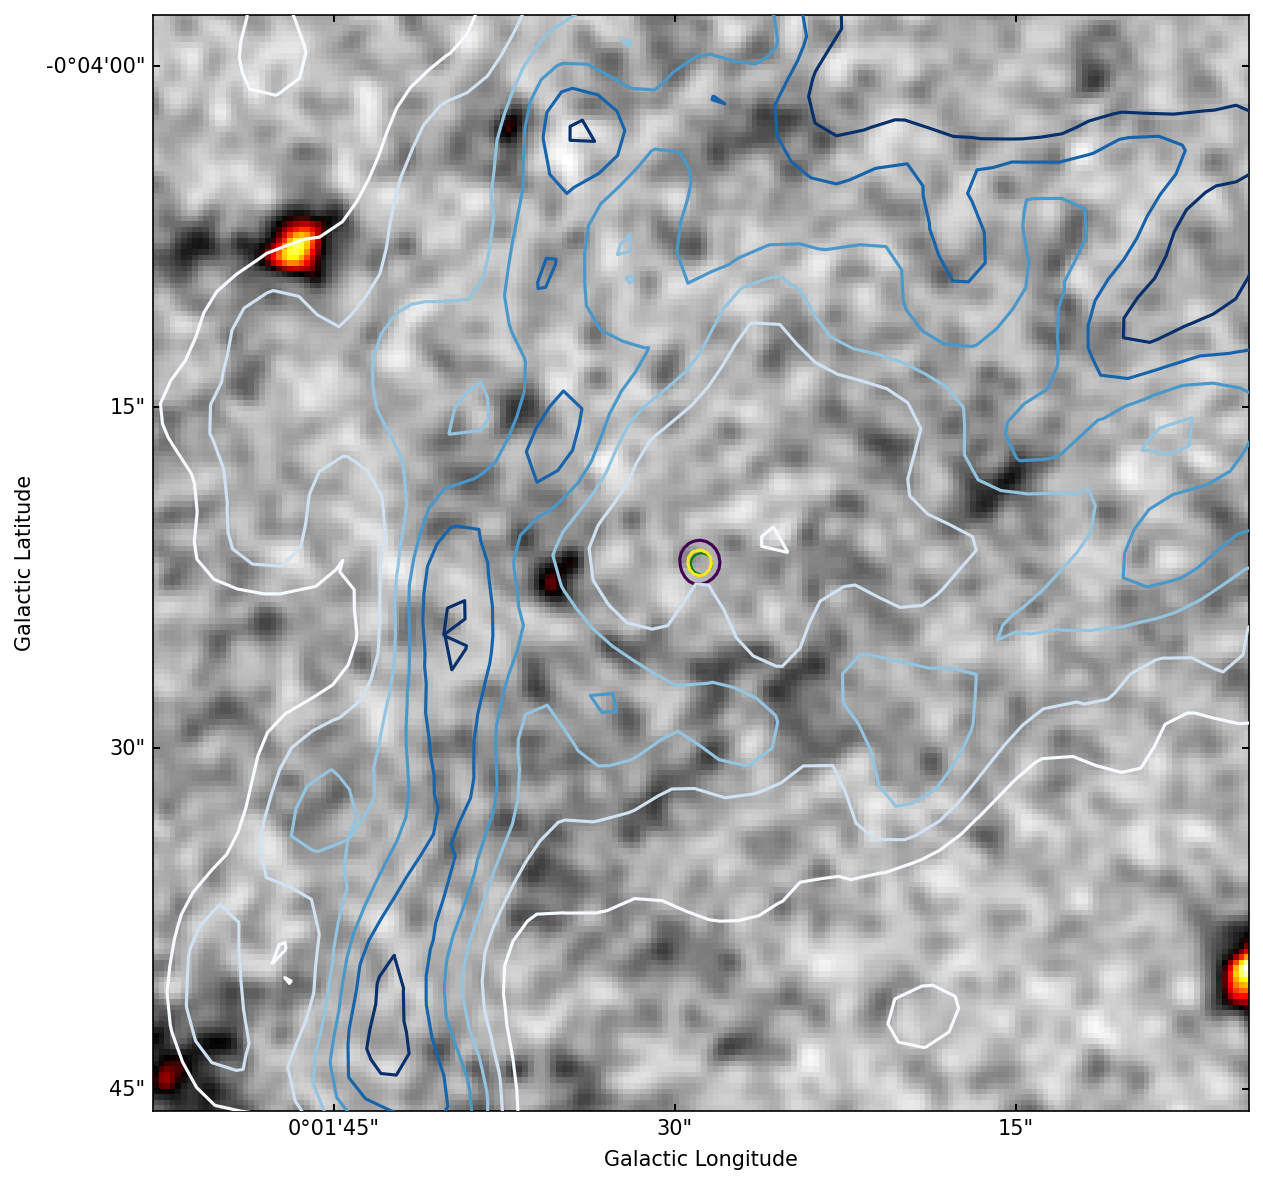

In [33]:
pl.figure(figsize=(12,8), dpi=150)
fn = '/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/acisi-band3-4.fits'
fh = fits.open(fn)
ww = WCS(fh[0].header).celestial
msk = bigregion.to_pixel(ww).to_mask()
slcs, _ = msk.get_overlap_slices(fh[0].data.squeeze().shape)
co = msk.cutout(fh[0].data.squeeze())
ax = pl.subplot(1,1,1, projection=ww[slcs])
ax.imshow(co, cmap=mymap)
ax.scatter_coord(coord, marker='o', facecolor='none', edgecolor='g', s=100)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ]);

fhmk = fits.open(ims['20cm'])
ww2 = WCS(fhmk[0].header).celestial
msk = biggerregion.to_pixel(ww2).to_mask()
slcs, _ = msk.get_overlap_slices(fhmk[0].data.squeeze().shape)
co = msk.cutout(fhmk[0].data.squeeze())


lon = ax.coords[0]
lat = ax.coords[1]
#lon.set_ticks_visible(False)
#lon.set_ticklabel_visible(False)
#lat.set_ticks_visible(False)
#lat.set_ticklabel_visible(False)
lon.set_axislabel('Galactic Longitude')
lat.set_axislabel('Galactic Latitude')

pl.tight_layout()
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_dwang_overlay.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_dwang_overlay.png', bbox_inches='tight')
ax.contour(co, transform=ax.get_transform(ww2[slcs]), levels=np.linspace(0.005, 0.0068, 6), cmap=pl.cm.Blues)
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_dwang_overlay_withMEERKAT.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/chandra_dwang_overlay_withMEERKAT.png', bbox_inches='tight')

# Context Images

## CO Context Image

courtesy sofue

In [34]:
cloudreg = regions.RectangleSkyRegion(coord.galactic, 15*u.arcmin, 15*u.arcmin)
cocube = SpectralCube.read('/orange/adamginsburg/cmz/nobeyama/12CO-2.BEARS.FITS', format='fits').subcube_from_regions([cloudreg])
cocube

SpectralCube with shape=(230, 120, 120) and unit=K:
 n_x:    120  type_x: GLON-SFL  unit_x: deg    range:     0.148587 deg:  359.900710 deg
 n_y:    120  type_y: GLAT-SFL  unit_y: deg    range:    -0.196496 deg:    0.051381 deg
 n_s:    230  type_s: VOPT      unit_s: km / s  range:     -229.000 km / s:     229.000 km / s

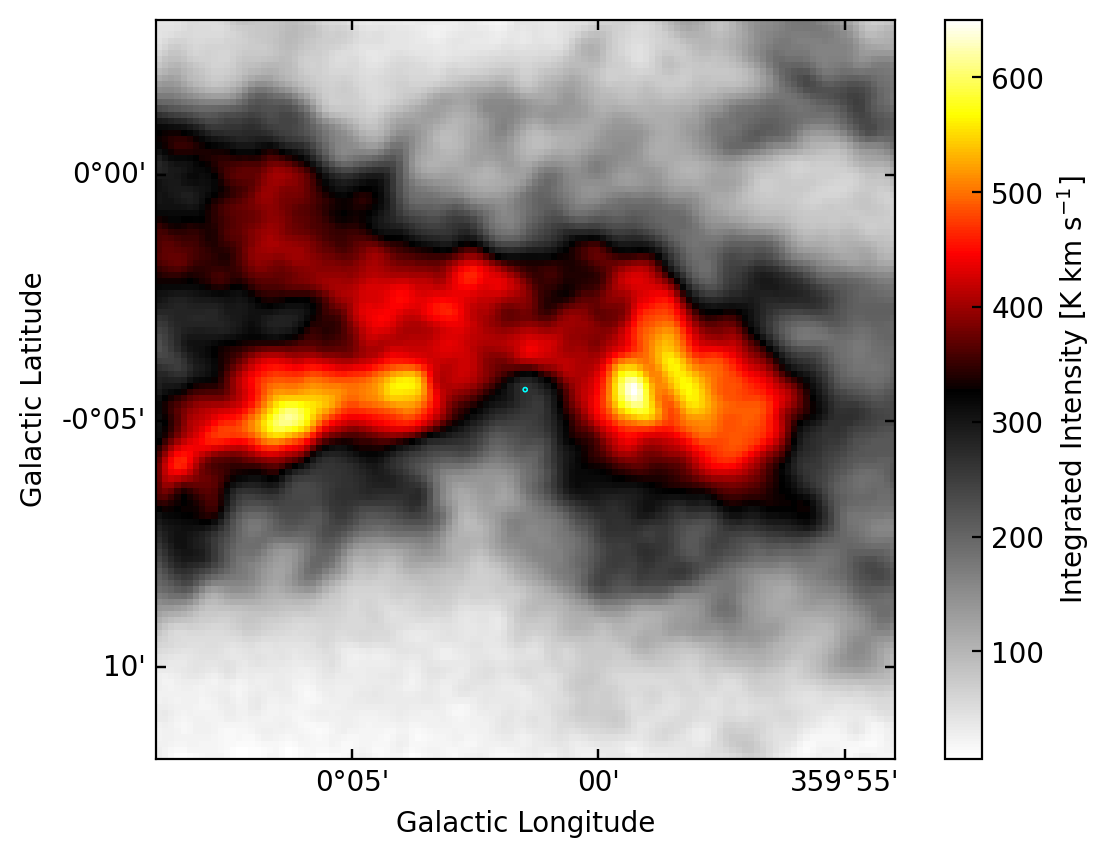

In [35]:
cobearsm0 = cocube.spectral_slab(45*u.km/u.s, 55*u.km/u.s).moment0()
ax = pl.subplot(projection=cobearsm0.wcs.celestial)
im_ = ax.imshow(cobearsm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cobearsm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12COContext.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12COContext.png', bbox_inches='tight')

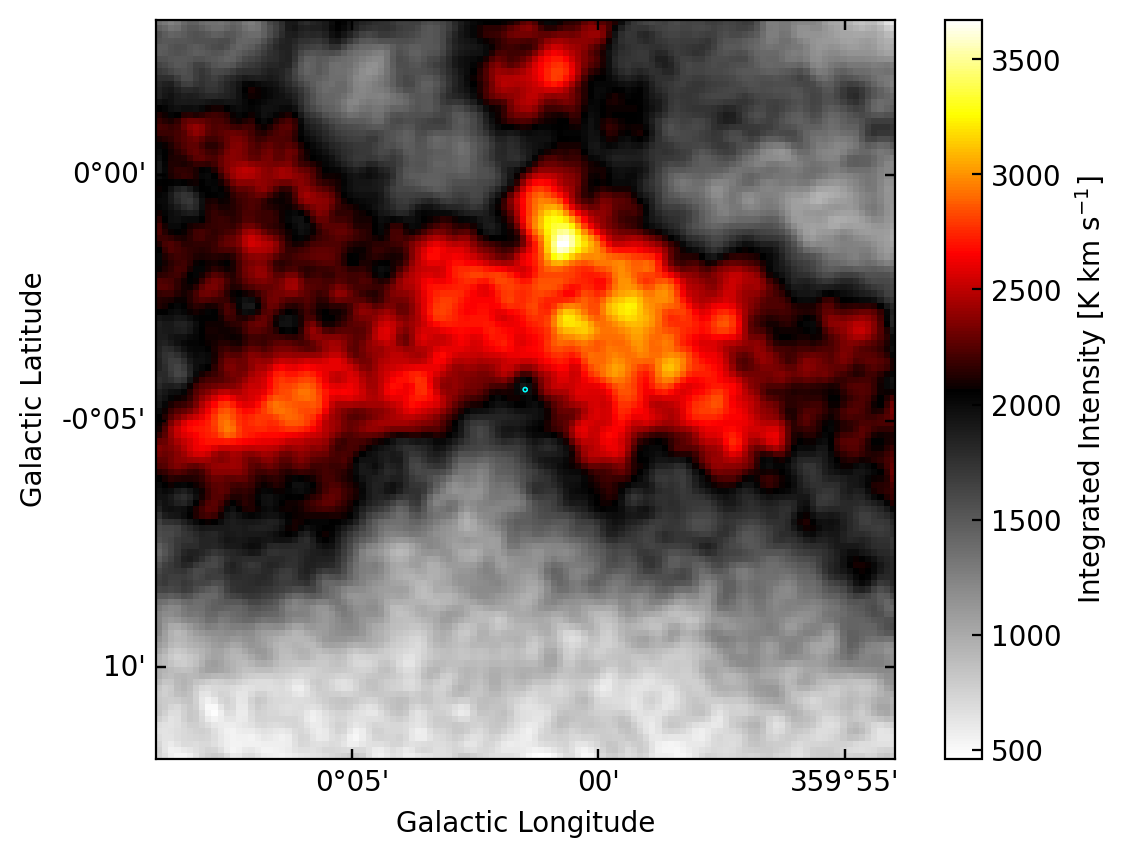

In [36]:
cobearsm0 = cocube.moment0()
ax = pl.subplot(projection=cobearsm0.wcs.celestial)
im_ = ax.imshow(cobearsm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cobearsm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12COContext_AllVelo.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12COContext_AllVelo.png', bbox_inches='tight')

## TP

In [37]:
cube = SpectralCube.read('/orange/adamginsburg/ACES/mosaics/cubes/ACES_TP_spw25_mosaic.fits')
cube.allow_huge_operations = True
cs_tp = cube.with_spectral_unit(u.km/u.s, rest_value=97.98095*u.GHz, velocity_convention='radio').spectral_slab(-300*u.km/u.s, 300*u.km/u.s)
so_tp = cube.with_spectral_unit(u.km/u.s, rest_value=99.29987*u.GHz, velocity_convention='radio').spectral_slab(-300*u.km/u.s, 300*u.km/u.s)
m0cs = cs_tp.to(u.K).moment0(axis=0)
m0so = so_tp.to(u.K).moment0(axis=0)

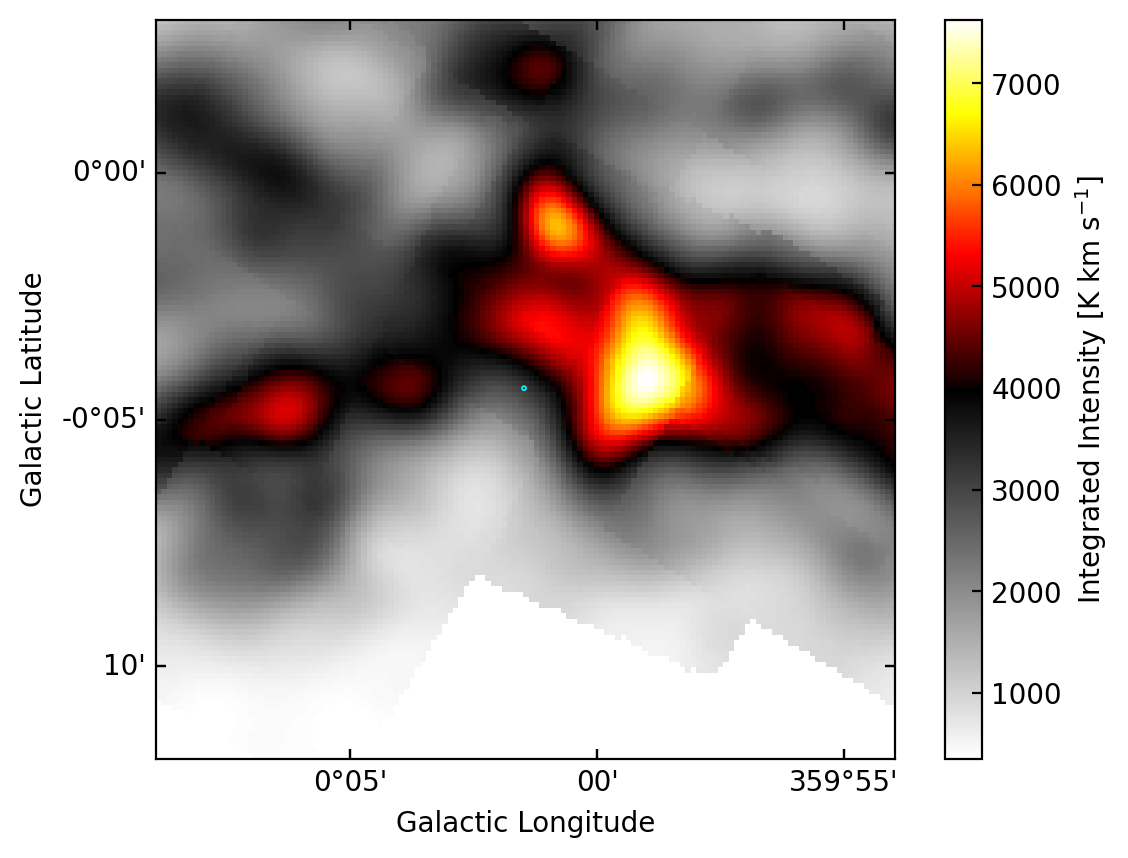

In [38]:
cs_tpm0 = cs_tp.subcube_from_regions([cloudreg]).moment0()
ax = pl.subplot(projection=cs_tpm0.wcs.celestial)
im_ = ax.imshow(cs_tpm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cs_tpm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21TPContext_AllVelo.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21TPContext_AllVelo.png', bbox_inches='tight')

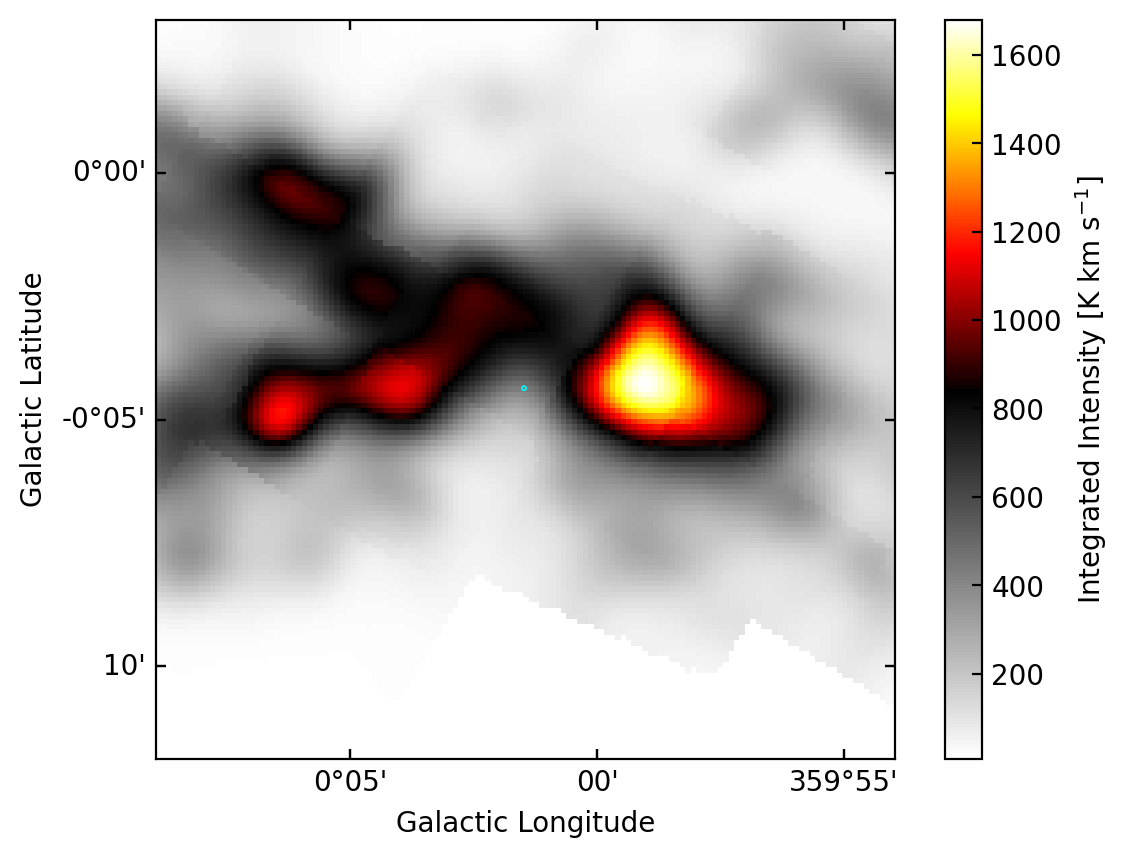

In [39]:
cs_tpm0 = cs_tp.subcube_from_regions([cloudreg]).spectral_slab(45*u.km/u.s, 55*u.km/u.s).moment0()
ax = pl.subplot(projection=cs_tpm0.wcs.celestial)
im_ = ax.imshow(cs_tpm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cs_tpm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21TPContext_45to55kms.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21TPContext_45to55kms.png', bbox_inches='tight')

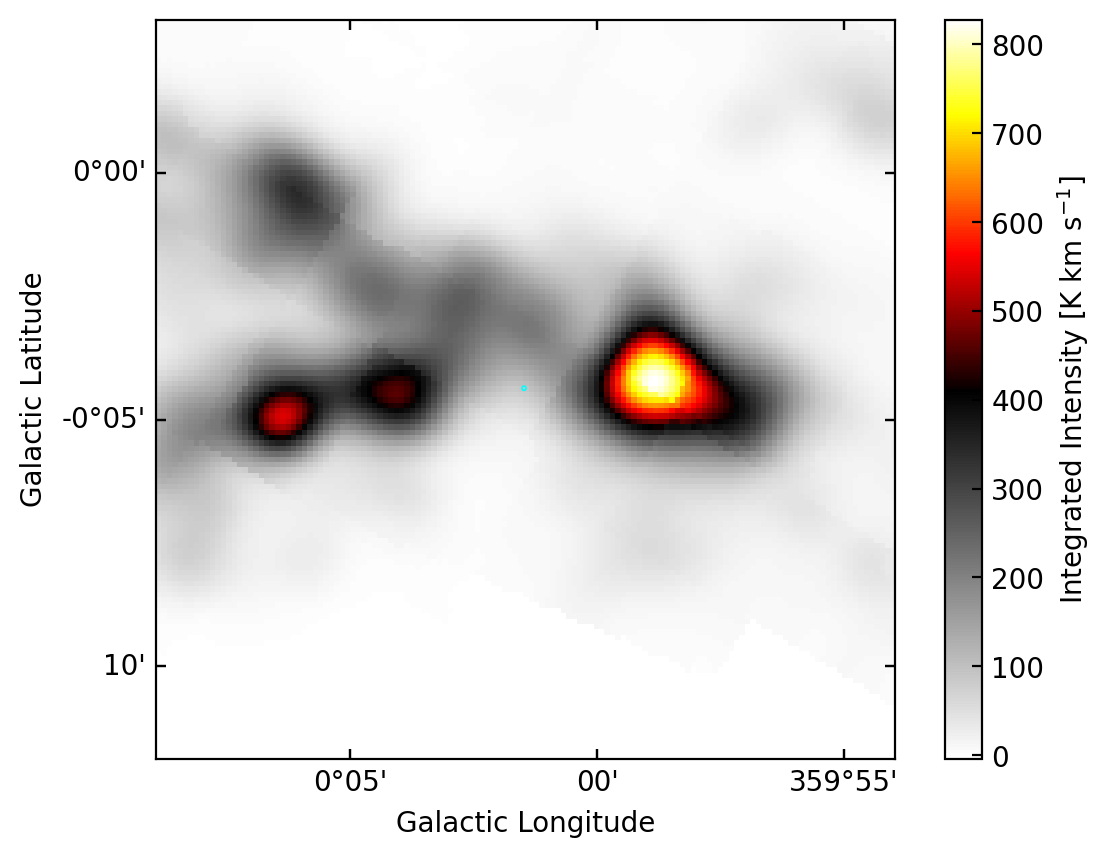

In [40]:
so_tpm0 = so_tp.subcube_from_regions([cloudreg]).spectral_slab(45*u.km/u.s, 55*u.km/u.s).moment0()
ax = pl.subplot(projection=so_tpm0.wcs.celestial)
im_ = ax.imshow(so_tpm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = so_tpm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO21TPContext_45to55kms.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO21TPContext_45to55kms.png', bbox_inches='tight')

## Mustang

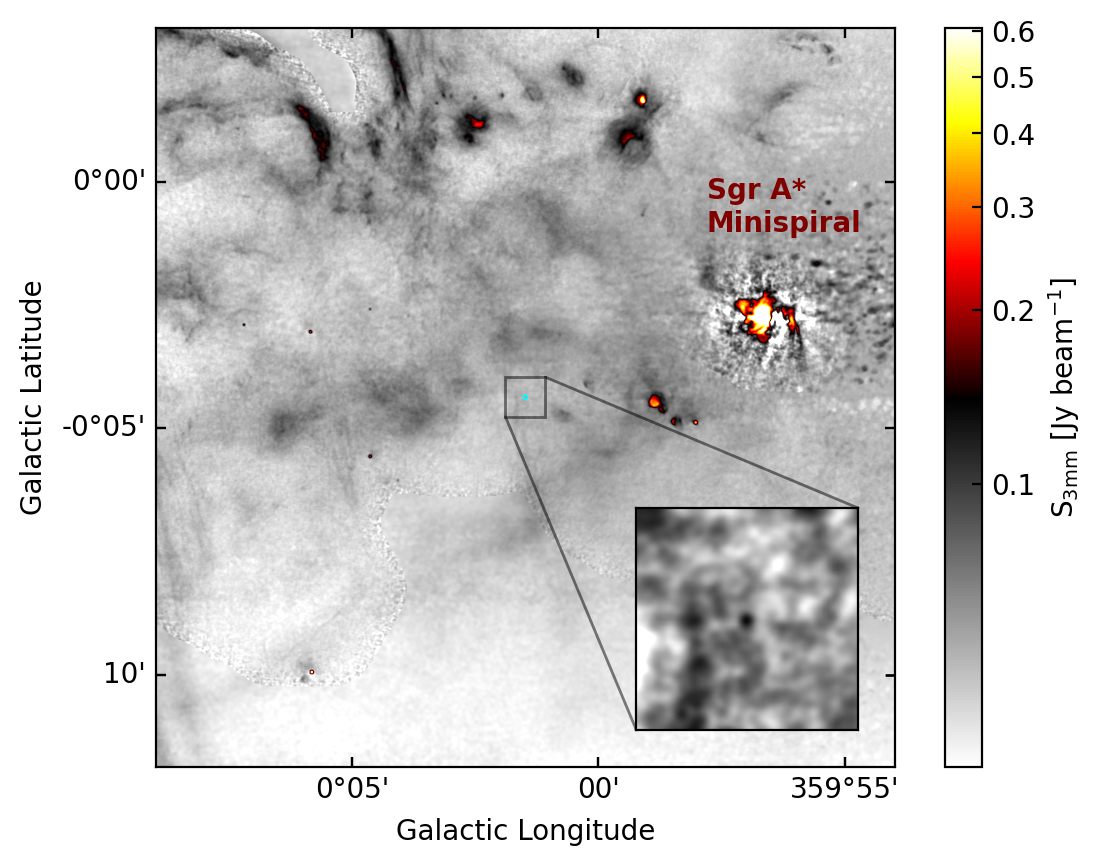

In [41]:
fhmustang = fits.open('/orange/adamginsburg/ACES/mosaics/continuum/12m_continuum_commonbeam_circular_reimaged_mosaic_MUSTANGfeathered.fits')
wwmustang = WCS(fhmustang[0].header)
cloudmask = cloudreg.to_pixel(wwmustang).to_mask()
slcs,_ = cloudmask.get_overlap_slices(fhmustang[0].data.squeeze().shape)
mustangcld = cloudmask.cutout(fhmustang[0].data)
ax = pl.subplot(projection=wwmustang[slcs])
im_ = ax.imshow(mustangcld, cmap=mymap, norm=simple_norm(mustangcld, max_percent=99.95, min_percent=1, stretch='asinh'))
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
cb = pl.colorbar(mappable = im_)
cb.set_label("S$_{3 \mathrm{mm}}$ [Jy beam$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

slcs_inset,_ = bigregion.to_pixel(wwmustang[slcs]).to_mask().get_overlap_slices(mustangcld.shape)
brmask = bigregion.to_pixel(wwmustang).to_mask()
slcs,_ = brmask.get_overlap_slices(fhmustang[0].data.squeeze().shape)
axins = ax.inset_axes([0.65, 0.05, 0.3, 0.3],
                      xlim=(slcs_inset[0].start, slcs_inset[0].stop),
                      ylim=(slcs_inset[1].start, slcs_inset[1].stop),
                      #projection=wwmustang[slcs_inset]
                     )
im_ = axins.imshow(mustangcld, cmap=mymap,
                   norm=simple_norm(mustangcld, max_cut=0.13, min_cut=0.036, stretch='asinh'))
axins.set_xticklabels("")
axins.set_yticklabels("")
axins.set_xticks([])
axins.set_yticks([])
# axins.coords[0].set_axislabel("")
# axins.coords[1].set_axislabel("")
# axins.coords[0].set_ticklabel(visible=False)
# axins.coords[1].set_ticklabel(visible=False);
# axins.coords[0].set_ticks_visible(False)
# axins.coords[1].set_ticks_visible(False);
ax.indicate_inset_zoom(axins, edgecolor="black");
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/MUSTANG3mmContext.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/MUSTANG3mmContext.png', bbox_inches='tight')
ax.text((360*u.deg - 2.2*u.arcmin).to(u.deg).value, (-1*u.arcmin).to(u.deg).value,
        'Sgr A*\nMinispiral', color='maroon', transform=ax.get_transform('galactic'),
        fontweight='bold',
       )
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/MUSTANG3mmContext_withlabel.png', bbox_inches='tight')

In [42]:
xx,yy

(array(67.77244189), array(68.15663745))

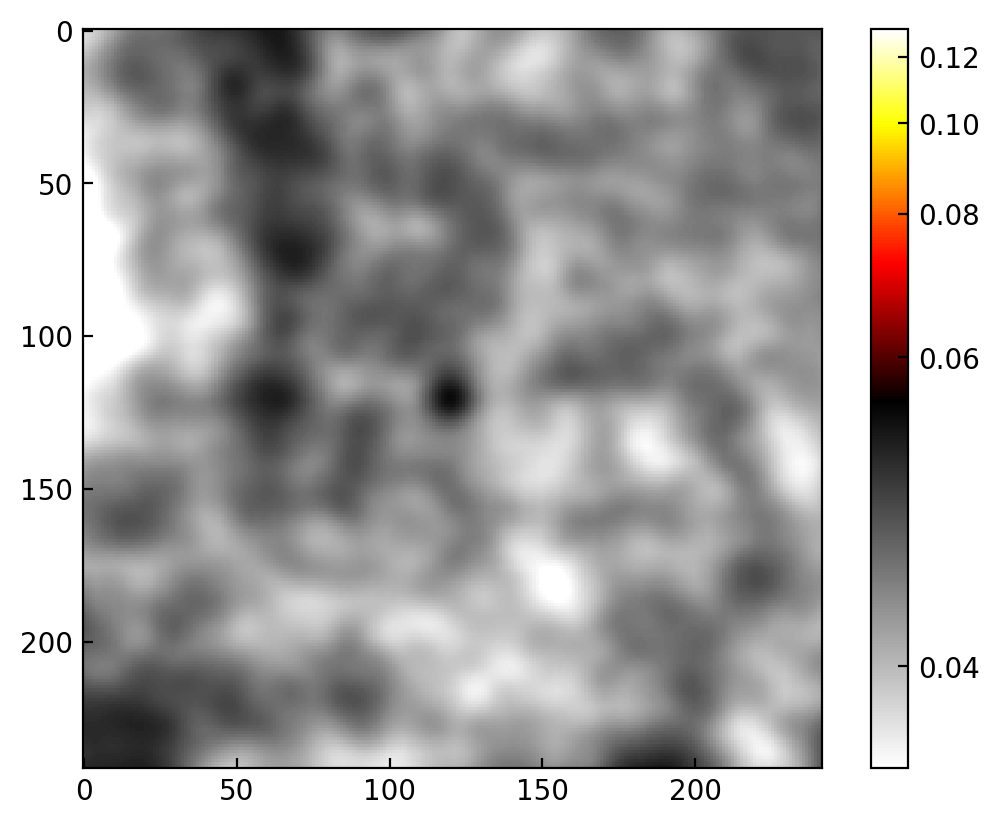

In [43]:
pl.imshow(mustangcld[slcs_inset],
          cmap=mymap,
          norm=simple_norm(mustangcld, max_cut=0.13, min_cut=0.036, stretch='asinh'))
pl.colorbar()

# CO Context: CO 3-2

In [44]:
cloudreg = regions.RectangleSkyRegion(coord.galactic, 15*u.arcmin, 15*u.arcmin)
co32cube = SpectralCube.read('/orange/adamginsburg/cmz/CHIMPS/12CO_GC_359-000_mosaic.fits', format='fits').subcube_from_regions([cloudreg])
co32cube

SpectralCube with shape=(763, 150, 150) and unit=K:
 n_x:    150  type_x: GLON-TAN  unit_x: deg    range:     0.148265 deg:  359.899937 deg
 n_y:    150  type_y: GLAT-TAN  unit_y: deg    range:    -0.196680 deg:    0.051647 deg
 n_s:    763  type_s: VRAD      unit_s: km / s  range:     -406.824 km / s:     355.176 km / s

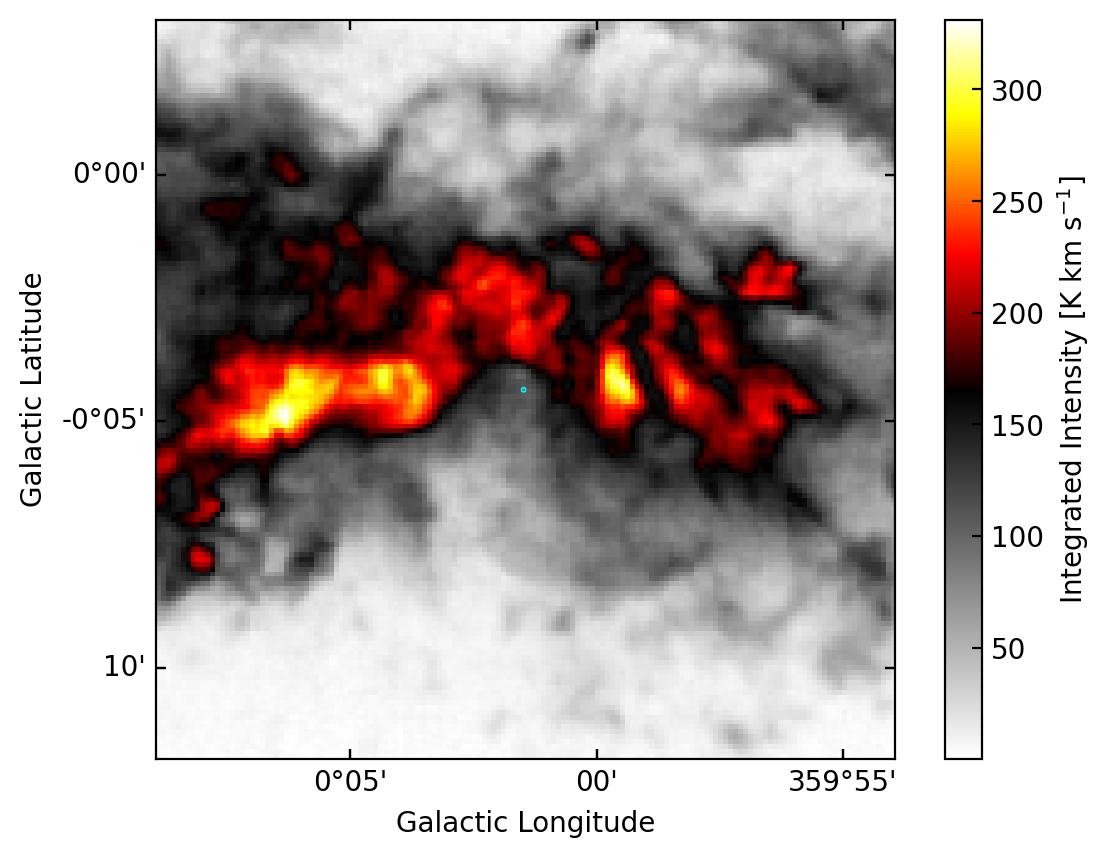

In [45]:
cochimpsm0 = co32cube.spectral_slab(45*u.km/u.s, 55*u.km/u.s).moment0()
ax = pl.subplot(projection=cochimpsm0.wcs.celestial)
im_ = ax.imshow(cochimpsm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cochimpsm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32Context.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32Context.png', bbox_inches='tight')

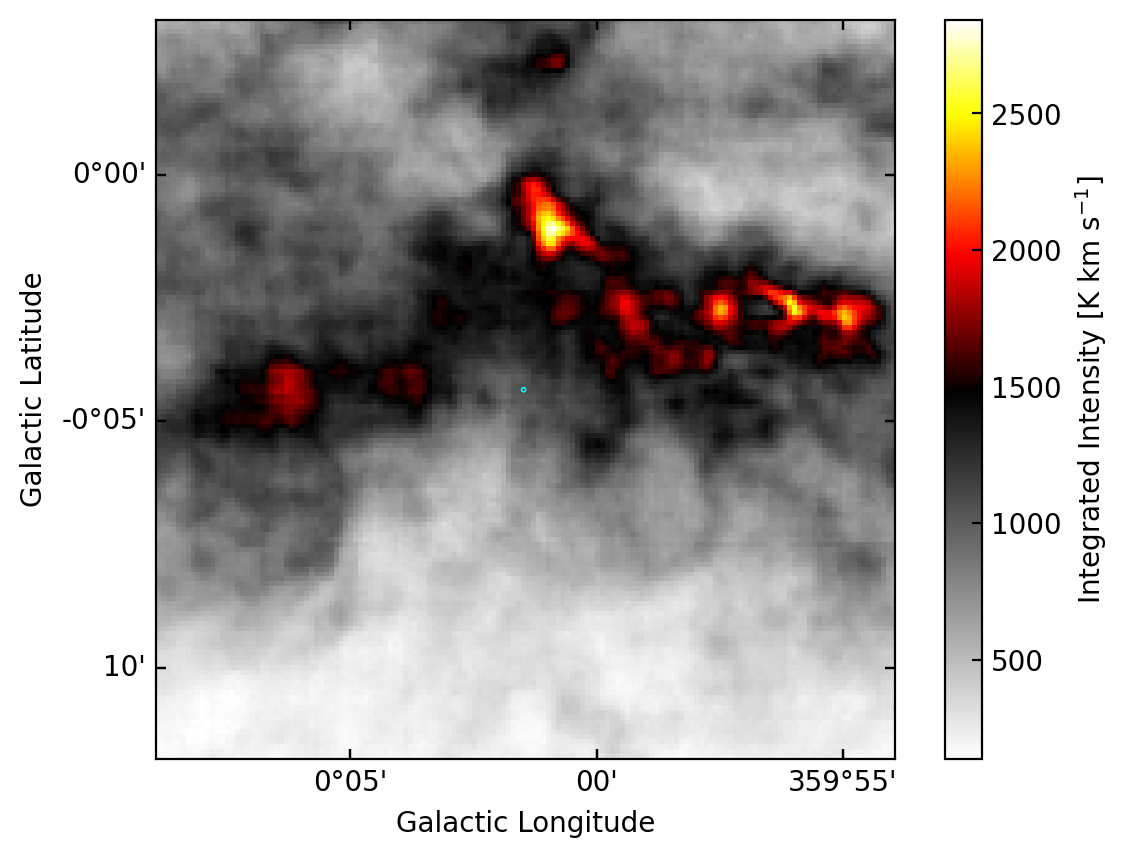

In [46]:
cochimpsm0 = co32cube.moment0()
ax = pl.subplot(projection=cochimpsm0.wcs.celestial)
im_ = ax.imshow(cochimpsm0.value, cmap=mymap)
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ],
           colors=['cyan', 'cyan'],
          );
xx, yy = cochimpsm0.wcs.celestial.world_to_pixel(coord)
#ax.arrow(xx, yy-20, 0, 15, color='b', width=1)
cb = pl.colorbar(mappable=im_)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32Context_AllVelo.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32Context_AllVelo.png', bbox_inches='tight')

# CO spectra

In [56]:
socube = SpectralCube.read(
'/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw33.cube.I.iter1.reclean.image',    
                           format='casa_image').with_spectral_unit(u.km/u.s, rest_value=99.29987e9*u.Hz, velocity_convention='radio')
xx, yy = map(int, socube.wcs.celestial.world_to_pixel(coord))
sospec = socube[:, yy, xx].to(u.K)
socube

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


DaskSpectralCube with shape=(3840, 1728, 1600) and unit=Jy / beam and chunk size (60, 54, 1600):
 n_x:   1600  type_x: RA---SIN  unit_x: deg    range:   266.418622 deg:  266.550714 deg
 n_y:   1728  type_y: DEC--SIN  unit_y: deg    range:   -29.042373 deg:  -28.917645 deg
 n_s:   3840  type_s: VRAD      unit_s: km / s  range:     -723.163 km / s:    4936.467 km / s

In [60]:
sospec.spectral_axis

<Quantity [4936467.44935735, 4934993.2032304 , 4933518.95710345, ...,
           -720214.93975077, -721689.18587772, -723163.43200467] m / s>

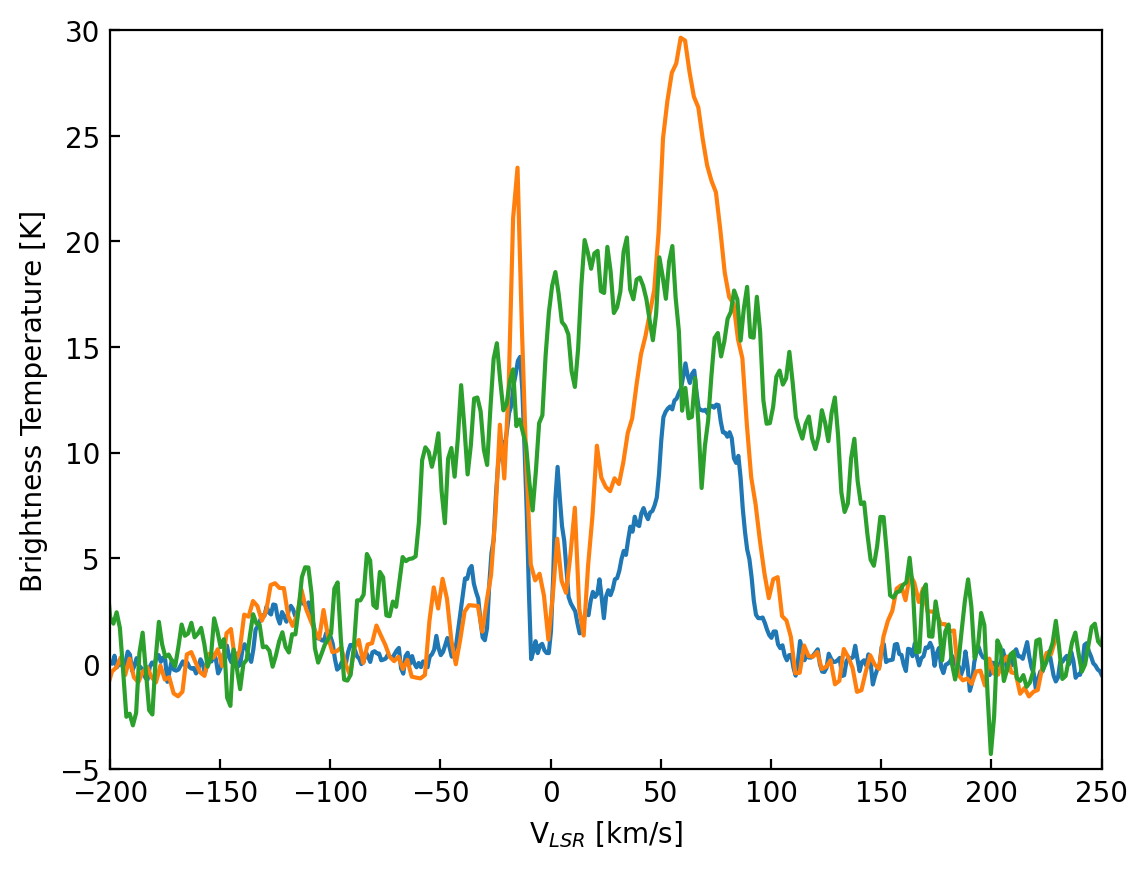

In [67]:
xx, yy = map(int, cochimpsm0.wcs.celestial.world_to_pixel(coord))
sp32 = co32cube[:,yy,xx]
pl.plot(sp32.spectral_axis, sp32.value, label='CO 3-2')

xx, yy = map(int, cobearsm0.wcs.celestial.world_to_pixel(coord))
sp10 = cocube[:,yy,xx]
pl.plot(sp10.spectral_axis, sp10.value, label='CO 1-0')

pl.plot(sospec.spectral_axis.to(u.km/u.s), sospec.value*10, label='SO 3(2)-2(1) $\\times10$')
pl.xlim(-200, 250);
pl.xlabel("V$_{LSR}$ [km/s]")
pl.ylabel("Brightness Temperature [K]");
pl.ylim(-5,30);

In [ ]:
xx, yy = map(int, cochimpsm0.wcs.celestial.world_to_pixel(coord))
sp32 = co32cube[:,yy,xx]
pl.plot(sp32.spectral_axis, sp32.value, label='CO 3-2')

#xx, yy = map(int, cobearsm0.wcs.celestial.world_to_pixel(coord))
#sp10 = cocube[:,yy,xx]
#pl.plot(sp10.spectral_axis, sp10.value, label='CO 1-0')

pl.plot(sospec.spectral_axis.to(u.km/u.s), sospec.value*5, label='SO 3(2)-2(1) $\\times5$')
pl.xlim(-200, 250);
pl.xlabel("V$_{LSR}$ [km/s]")
pl.ylabel("Brightness Temperature [K]");
pl.ylim(-2.5,15);
pl.legend(loc='best');
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32_with_SOontop.png', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/12CO32_with_SOontop.pdf', bbox_inches='tight')